In [1]:
def accuracy(y_true, y_pred):
    #initialize a counter for correct predictions
    correct_counter =0 
    #loop over all elements of y_true 
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth,increase the counter
            correct_counter +=1
    #return acc: 
    return correct_counter/len(y_true)


In [2]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1, 0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)


0.625

In [4]:
def true_positive(y_true, y_pred):
    tp=0
    for yt, yp in zip(y_true, y_pred):
        if yt ==1 and yp==1:
            tp+=1
    return tp

In [5]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1, 0,1,0,1,0,0]
true_positive(l1, l2)

2

In [6]:
def false_negative(y_true, y_pred):
    fn =0 
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==0:
            fn +=1
    return fn

In [8]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp/(tp+fn)
    return recall

In [9]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1, 0,1,0,1,0,0] 
recall(l1, l2)

0.5

In [12]:
def false_positive(y_true, y_pred):
    fp =0 
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==1:
            fp +=1
    return fp

In [13]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp/(tp+fp)
    return precision

In [29]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
            0.0490937, 0.0191491, 0.17554844,
            0.15952202, 0.03819563, 0.11639273,
            0.079377, 0.08584789, 0.39095342,
            0.27259048, 0.03447096, 0.04644807,
            0.03543574, 0.18521942, 0.05934905,
            0.61977213, 0.33056815]
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]
# với mỗi threshold, tính giá trị dự đoán 
for i in thresholds:
    for x in y_pred:
        # if x>=i:
        #     temp_prediction=  1
        # else:
        #     temp_prediction =0
        temp_prediction = [1 if x>= i else 0 for x in y_pred]
        p = precision(y_true, temp_prediction)
        r = recall(y_true, temp_prediction)
        precisions.append(p)
        recalls.append(r) 

Text(0.5, 0, 'Precision')

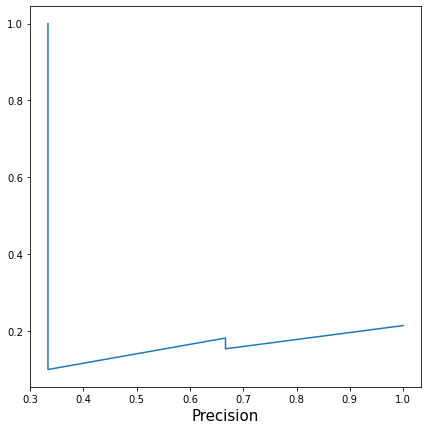

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize =15)
plt.xlabel('Precision', fontsize =15)

In [18]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1_score = 2*p*r/(p+r)
    return f1_score

In [19]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)



0.5714285714285715

In [20]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [37]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

In [38]:
def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp ==0:
            tn+=1
    return tn

In [36]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp/(tn+fp)
    

In [40]:
tpr_list = []
fpr_list = []
#nhãn thật
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
            0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

#loop over all thresholds:
for thresh in thresholds:
    temp_pred = [1 if x>= thresh else 0 for x in y_pred]
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)

    # p = precision(y_true, temp_prediction)
    # r = recall(y_true, temp_prediction)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
print(tpr_list)

[1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]


Text(0, 0.5, 'TPR')

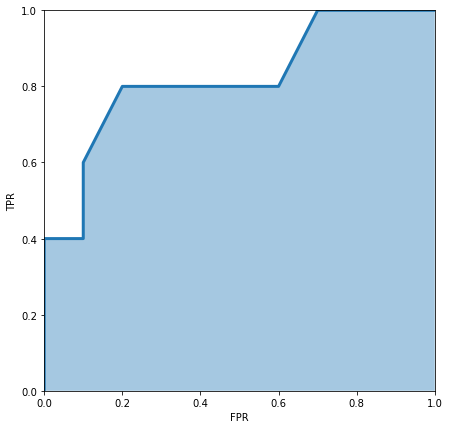

In [42]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [43]:
#AUC example
y_true = [0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
        0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
        0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)


0.8300000000000001

In [45]:
# How thresholds impacts TP and FP
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

#loop over all thresholds:
for thresh in thresholds:
    #calculate predictions for a given threshold 
    temp_pred = [1 if x>=thresh else 0 for x in y_pred]
    #calculate tp 
    temp_tp = true_positive(y_true, temp_pred)
    #calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    #append tp and fp to lists 
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [46]:
import numpy as np
def log_loss(y_true, y_proba):
    #function to calculate fpr
    #define an epsilon value 
    epsilon = 1e-15
    #khởi tạo một mảng rỗng để lưu loss
    loss = []
    #loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1-epsilon)
        #calculate loss for one sample
        temp_loss = -1.0*(yt*np.log(yp)+(1-yt)*np.log(1-yp))
        #add to loss list
        loss.append(temp_loss)
    #return mean loss over all samples
    return np.mean(loss)

In [47]:
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
log_loss(y_true, y_proba)



0.49882711861432294

In [49]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba) 


0.49882711861432294

In [50]:
import numpy as np
def macro_precision(y_true, y_pred):
    #calculate macro averaged precision 
    num_classes = len(np.unique(y_true))
    #initialize precision =0
    precision =0 
    #loop over all classes
    for class_ in range(num_classes):
        #all classes except current are considered negative 
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p==class_ else 0 for p in y_true]
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp/(tp+fp)
        precision += temp_precision 

    precision /= num_classes 
    return precision

In [55]:
from collections import Counter
import numpy as np
def weighted_f1(y_true, y_pred):
    #tìm số classes bằng cách lấy chiều dài các giá trị duy nhất trong true list
    num_classes = len(np.unique(y_true))
    #create class:sample count dictionary 
    class_counts = Counter(y_true)
    #initialize f1 to 0 
    f1 =0 
    #loop over all classes 
    for class_ in range(num_classes):
        #all classes except current are considered negative 
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        #calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)

        #calculate f1 of class:
        if p+r !=0:
            temp_f1 = 2*p*r/(p+r)
        else:
            temp_f1 = 0 
        #multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_]*temp_f1 
        #add to f1 precision
        f1 += weighted_f1
        #calculate overall F1 by dividing by total number of samples
        overall_f1 = f1/len(y_true)
        return overall_f1

In [56]:
from sklearn import metrics 
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

weighted_f1(y_true, y_pred)
# metrics.f1_score(y_true, y_pred, average = 'weighted')


0.2857142857142857

Text(0.5, 50.5, 'Predicted Labels')

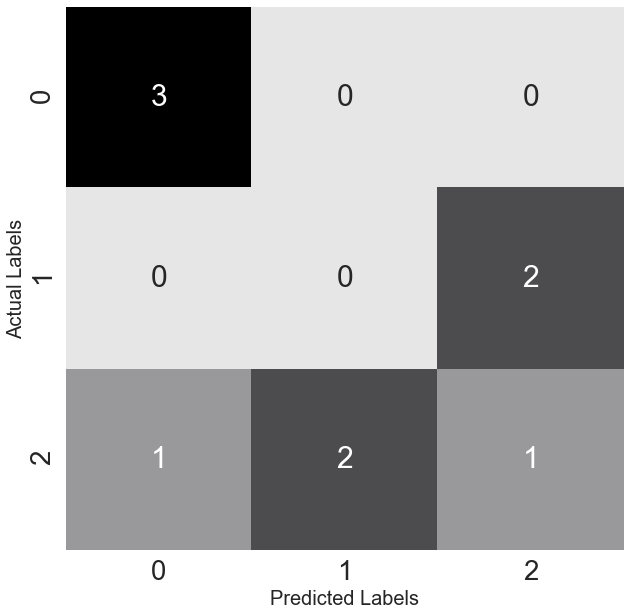

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics 
#target
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
# predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

#confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

#plot using matplotlib and seaborn 
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot =0 , light = 0.9, dark = 0, as_cmap =True)
sns.set(font_scale = 2.5)
# sns.set(font_scale =2.5)
sns.heatmap(cm, annot = True, cmap =cmap, cbar = False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

In [7]:
#multi-label -   Presicion at k 
def pk(y_true, y_pred, k):
    # if k = 0, return 0 , never have this 
    if k ==0: 
        return 0
    #chỉ quan tâm dự đoán k thăng đầu
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    #find common values 
    common_values = pred_set.intersection(true_set)
    # return length of common values over k 
    return len(common_values)/len(y_pred[:k])
    

In [9]:
def apk(y_true, y_pred, k):

    # initialize p@k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
    # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

In [11]:
y_true = [
        [1, 2, 3],
        [0, 2],
        [1],
        [2, 3],
        [1, 0],
        []
        ]

y_pred = [
        [0, 1, 2],
        [1],
        [0, 2, 3],
        [2, 3, 4, 0],
        [0, 1, 2],
        [0]
        ]
for i in range(len(y_true)):
    for j in range(1,4):
        print(
            f""""
            y_true = {y_true[i]}, 
            y_pred = {y_pred[i]},
            AP@{j} = {apk(y_true[i], y_pred[i], k = j)}
            """
        )

"
            y_true = [1, 2, 3], 
            y_pred = [0, 1, 2],
            AP@1 = 0.0
            
"
            y_true = [1, 2, 3], 
            y_pred = [0, 1, 2],
            AP@2 = 0.25
            
"
            y_true = [1, 2, 3], 
            y_pred = [0, 1, 2],
            AP@3 = 0.38888888888888884
            
"
            y_true = [0, 2], 
            y_pred = [1],
            AP@1 = 0.0
            
"
            y_true = [0, 2], 
            y_pred = [1],
            AP@2 = 0.0
            
"
            y_true = [0, 2], 
            y_pred = [1],
            AP@3 = 0.0
            
"
            y_true = [1], 
            y_pred = [0, 2, 3],
            AP@1 = 0.0
            
"
            y_true = [1], 
            y_pred = [0, 2, 3],
            AP@2 = 0.0
            
"
            y_true = [1], 
            y_pred = [0, 2, 3],
            AP@3 = 0.0
            
"
            y_true = [2, 3], 
            y_pred = [2, 3, 4, 0],
            AP@1 = 1.0
           

In [14]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean avg precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
    # store apk values for every sample
        apk_values.append(
            apk(y_true[i], y_pred[i], k=k)
        )
        # return mean of apk values list
        return sum(apk_values) / len(apk_values)

In [19]:
y_true = [
        [1, 2, 3],
        [0, 2],
        [1],
        [2, 3],
        [1, 0],
        []
        ]

y_pred = [
        [0, 1, 2],
        [1],
        [0, 2, 3],
        [2, 3, 4, 0],
        [0, 1, 2],
        [0]
        ]
mapk(y_true, y_pred, k =3)


0.38888888888888884

In [21]:
import numpy as np
def mean_absolute_error(y_true, y_pred):

    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
    # calculate absolute error
    # and add to error
        error += np.abs(yt - yp)
        # return mean error
        return error / len(y_true) 

In [22]:
def mean_squared_error(y_true, y_pred):

    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
        # return mean error
        return error / len(y_true)

In [23]:
def mean_squared_error(y_true, y_pred):

    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
        # return mean error
        return error / len(y_true)


In [24]:
def mean_squared_error(y_true, y_pred):

    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
        # return mean error
        return error / len(y_true)

In [25]:
def mean_squared_error(y_true, y_pred):

    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
        # return mean error
        return error / len(y_true)

In [27]:
import numpy as np
def r2(y_true, y_pred):
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)
    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0
    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
        # calculate the ratio
        ratio = numerator / denominator
        # return 1 - ratio
        return 1 - ratio

In [28]:
import numpy as np
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [29]:
#Mathew' Correlation Coefficient (MCC)
def mcc(y_true, y_pred):

    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    numerator = (tp * tn) - (fp * fn)
    denominator = (
    (tp + fp) *
    (fn + tn) *
    (fp + tn) *
    (tp + fn)
    )
    denominator = denominator ** 0.5
    return numerator/denominator